# Predicting Loan Repayment


The dataset for this project is retrieved from kaggle, the home of Data Science.

The major aim of this project is to predict whether the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained.

### **1- Importing Libraries**

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import pickle

### **2- Getting Data**

In [162]:
df=pd.read_csv('loan_data_set.csv')

In [163]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [164]:
df.shape

(614, 13)

##### 2-1-Renaming columns

In [165]:
df.columns=df.columns.str.lower()

In [166]:
df.columns=['loan_id', 'gender', 'married', 'dependents', 'education','self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area','loan_status']

##### 2-2-Checking null values

In [167]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

we take care of missing values in "loan_amount" and "credit_history".
For other null values, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. 

In [169]:
df['loan_amount']=df['loanamount'].fillna(df['loanamount'].mean())   

In [170]:
df['credit_history']=df['credit_history'].fillna(df['credit_history'].median())   

In [171]:
df.dropna(axis=0, inplace=True)

In [172]:
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
loan_amount          0
dtype: int64

In [173]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,loan_amount
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,128.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,66.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,120.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,141.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,267.0


In [174]:
df.shape

(523, 14)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            523 non-null    object 
 1   gender             523 non-null    object 
 2   married            523 non-null    object 
 3   dependents         523 non-null    object 
 4   education          523 non-null    object 
 5   self_employed      523 non-null    object 
 6   applicantincome    523 non-null    int64  
 7   coapplicantincome  523 non-null    float64
 8   loanamount         523 non-null    float64
 9   loan_amount_term   523 non-null    float64
 10  credit_history     523 non-null    float64
 11  property_area      523 non-null    object 
 12  loan_status        523 non-null    object 
 13  loan_amount        523 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 61.3+ KB


In [176]:
df.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_amount
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,5316.097514,1604.498891,145.485660,341.988528,0.866157,145.485660
std,5549.509255,2576.549437,83.223682,65.782818,0.340810,83.223682
min,150.000000,0.000000,9.000000,12.000000,0.000000,9.000000
25%,2885.500000,0.000000,100.000000,360.000000,1.000000,100.000000
50%,3850.000000,1167.000000,128.000000,360.000000,1.000000,128.000000
75%,5825.000000,2292.500000,171.000000,360.000000,1.000000,171.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000,650.000000


##### 2-3-Label Encoder for Dependents

In [177]:
type(df['dependents'].iloc[0])

str

In [178]:
df['dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [179]:
model6=LabelEncoder()

In [180]:
model6.fit(df['dependents'])

LabelEncoder()

In [181]:
df['dependents']= model6.transform(df['dependents'])

### 3-Exploratory Data Analysis

##### 3-1- Visualization

In [182]:
df[df['loan_status']=='Y'].count()['loan_status']

367

In [183]:
df[df['loan_status']=='N'].count()['loan_status']

156

Text(0.5, 1.0, 'Distribution of Loan Status')

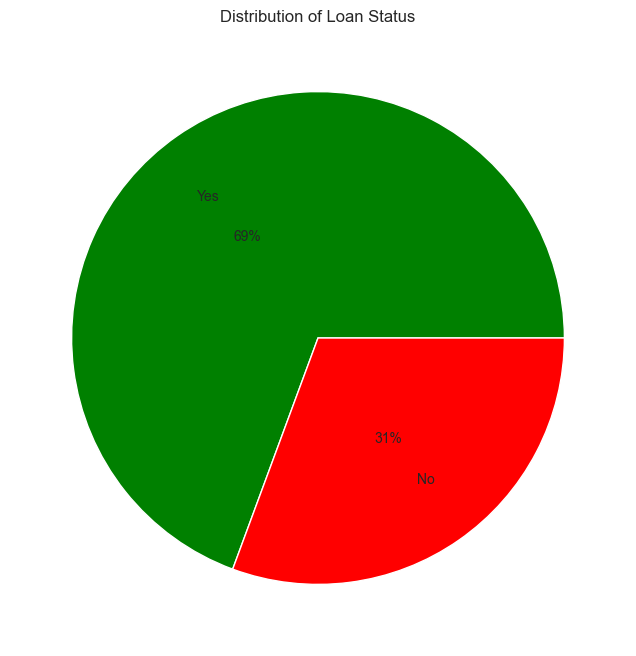

In [184]:
plt.figure(figsize=(8,8))
plt.pie(x=[376,166], labels=['Yes','No'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['g','r'])
plt.title('Distribution of Loan Status')

69% of applicants repay the loan and 39% do not repay the loan.

([], [])

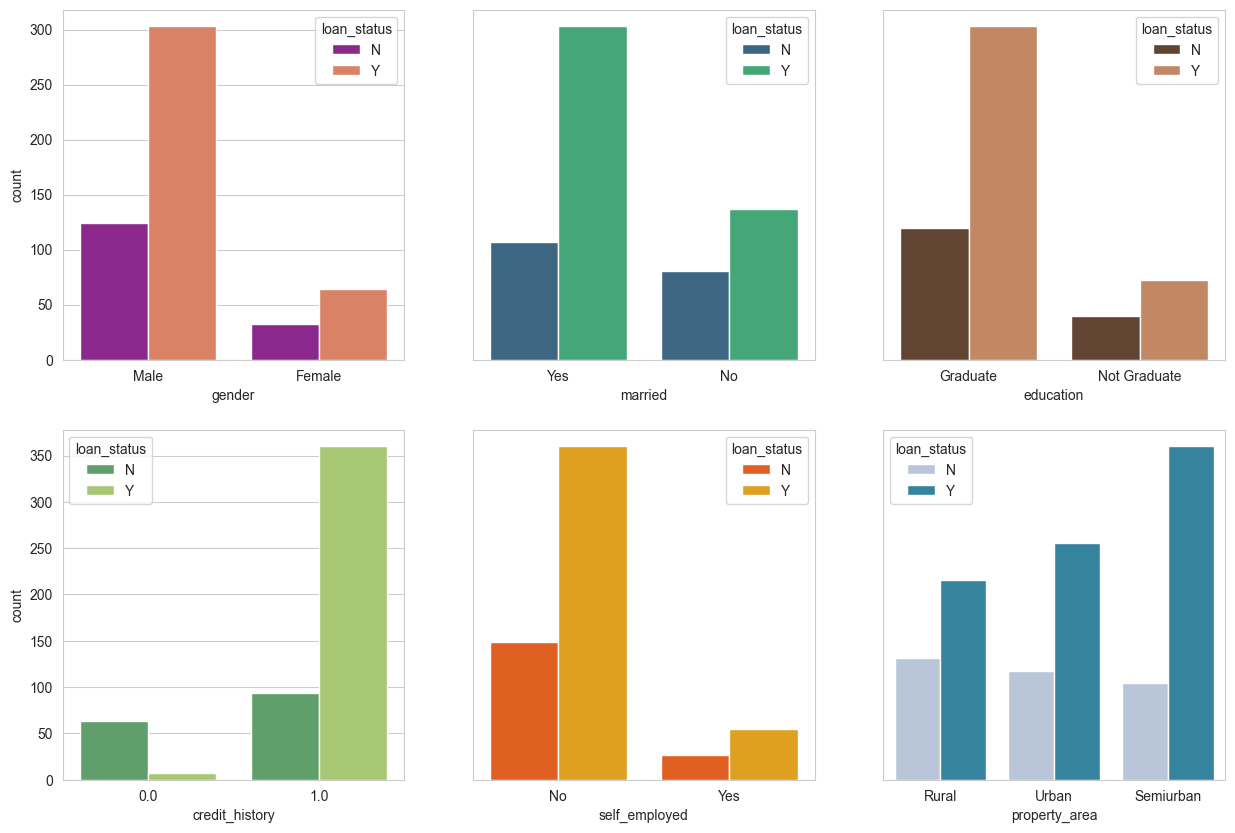

In [185]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x='gender' ,hue='loan_status', data=df,palette='plasma')

plt.subplot(2,3,2)
sns.countplot(x='married',hue='loan_status',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.countplot(x='education',hue='loan_status',data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.countplot(x='credit_history', data=df,hue='loan_status',palette='summer')

plt.subplot(2,3,5)
sns.countplot(x='self_employed',hue='loan_status',data=df,palette='autumn')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.countplot(x='property_area',data=df,hue='loan_status',palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([ ])

Comparison between Genders in getting the Loan shows that a Male Individual has more chance of repaying the Loan.

Comparison between Married Status in getting the Loan shows that a Married Individual has more chance of repaying the Loan.
   
Comparison between Education Status of an Individual in getting the Loan shows that a Graduate Individual has more chance of repaying the Loan.
    
Comparison between Self-Employed or Not in getting the Loan shows that Not Self-Employed has more chance of repaying the Loan.

Comparison between Credit History for getting the Loan shows that an individual with a credit history has more chance of repaying the Loan.
    
Comparison between Property Area for getting the Loan shows that People living in Semi-Urban Area have more chance to repay the Loan.

In [186]:
px.sunburst( data_frame=df,path=['gender','loan_status'], color='loan_amount')

([], [])

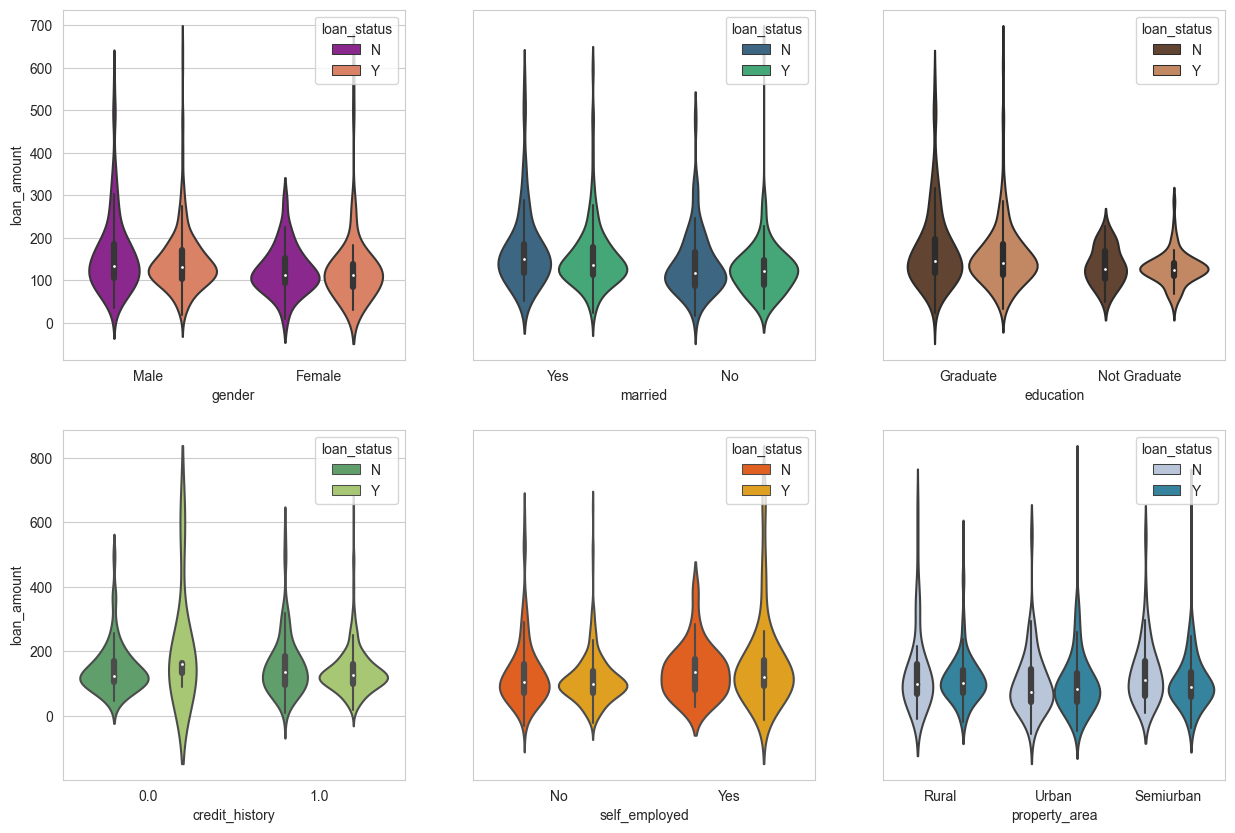

In [187]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.violinplot(x='gender', y='loan_amount',hue='loan_status', data=df,palette='plasma')

plt.subplot(2,3,2)
sns.violinplot(x='married',y='loan_amount',hue='loan_status',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.violinplot(x='education',y='loan_amount',hue='loan_status',data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.violinplot(x='credit_history',y='loan_amount', data=df,hue='loan_status',palette='summer')

plt.subplot(2,3,5)
sns.violinplot(x='self_employed',y='loan_amount',hue='loan_status',data=df,palette='autumn')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.violinplot(x='property_area', y='loan_amount',data=df,hue='loan_status',palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([ ])

C:\Users\sahil\AppData\Local\Temp\ipykernel_3424\3777177726.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sahil\AppData\Local\Temp\ipykernel_3424\3777177726.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sahil\AppData\Local\Temp\ipykernel_3424\3777177726.py:12: UserWarning:



`distplot` is a

<AxesSubplot: xlabel='loan_amount', ylabel='Density'>

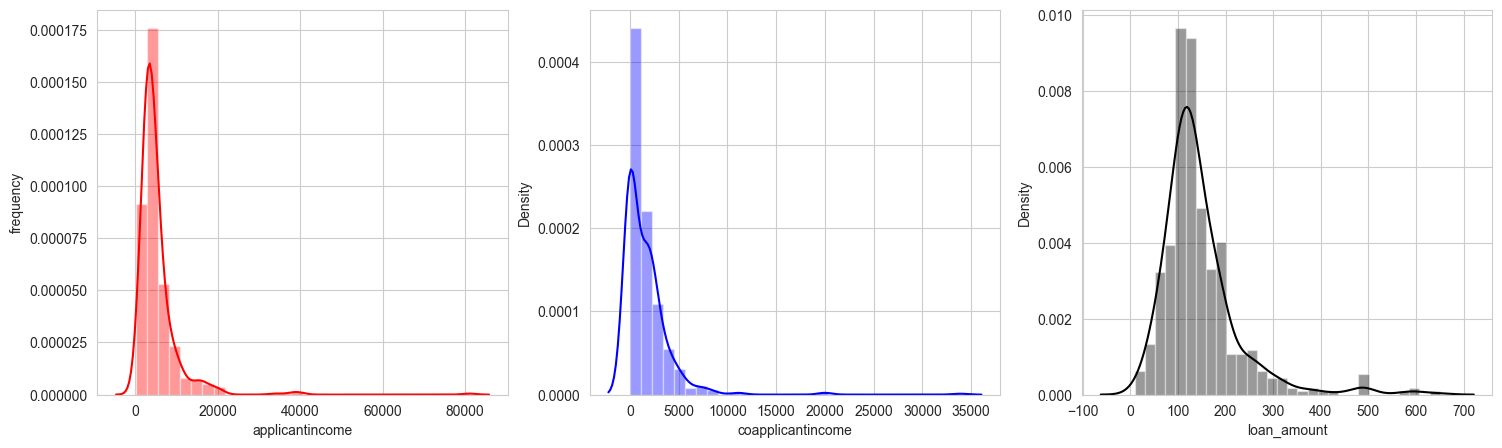

In [189]:
plt.figure(figsize=(18,5))


plt.subplot(1,3,1)
sns.distplot(df['applicantincome'],bins=30,color='r',hist_kws=dict(edgecolor='white'))
plt.ylabel('frequency')

plt.subplot(1,3,2)
sns.distplot(df['coapplicantincome'],bins=30,color='blue',hist_kws=dict(edgecolor='white'))

plt.subplot(1,3,3)
sns.distplot(df['loan_amount'],bins=30,color='black',hist_kws=dict(edgecolor='white'))

In [191]:
px.scatter_3d(data_frame=df,x='applicantincome',y='coapplicantincome',z='loan_amount',color='loan_status')

##### 3-2-Encoding

###### 3-2-1-gender

In [192]:
model1=LabelEncoder()

In [193]:
model1.fit(df['gender'])

LabelEncoder()

In [194]:
df['gender']= model1.transform(df['gender'])

###### 3-2-2-married

In [195]:
model2=LabelEncoder()

In [196]:
model2.fit(df['married'])

LabelEncoder()

In [197]:
df['married']= model2.transform(df['married'])

###### 3-2-3-education

In [198]:
model3=LabelEncoder()

In [199]:
model3.fit(df['education'])

LabelEncoder()

In [200]:
df['education']= model3.transform(df['education'])

###### 3-2-4-self_employed

In [201]:
model4=LabelEncoder()

In [202]:
model4.fit(df['self_employed'])

LabelEncoder()

In [203]:
df['self_employed']= model4.transform(df['self_employed'])

###### 3-2-5-property_area

In [204]:
model5=LabelEncoder()

In [205]:
model5.fit(df['property_area'])

LabelEncoder()

In [206]:
df['property_area']= model5.transform(df['property_area'])

###### 3-2-6-loan status

In [207]:
model6=LabelEncoder()

In [208]:
model6.fit(df['loan_status'])

LabelEncoder()

In [209]:
df['loan_status']= model6.transform(df['loan_status'])

In [210]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,loan_amount
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.0
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,267.0


C:\Users\sahil\AppData\Local\Temp\ipykernel_3424\2910223878.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix for Loan Status')

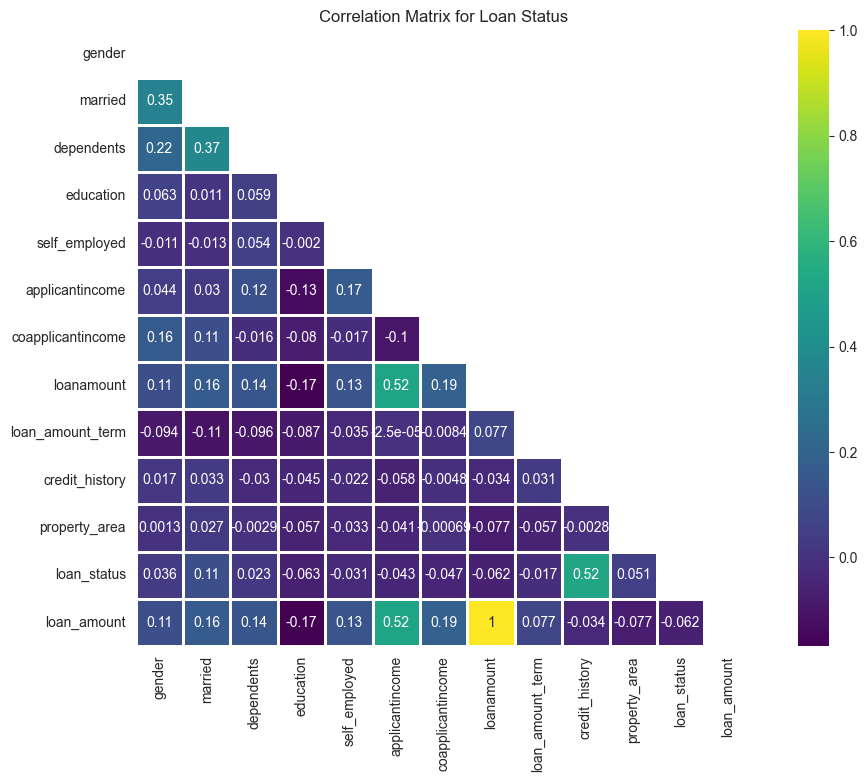

In [211]:
plt.figure(figsize=(12,8))

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True,linewidths=2, cmap='viridis')
plt.title('Correlation Matrix for Loan Status')

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

### 4-Prediction

##### 4-1-LogisticRegression

In [214]:
X=df.drop(['loan_id','loan_status', 'loan_amount'],axis=1)
y=df['loan_status']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [217]:
lr=LogisticRegression()

In [218]:
lr.fit(X_train, y_train)

c:\Users\sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [219]:
lr_prediction=lr.predict(X_test)

In [220]:
print(confusion_matrix(y_test,lr_prediction))
print('\n')
print(classification_report(y_test,lr_prediction))
print('\n')
print('Logistic Regression accuracy: ', accuracy_score(y_test,lr_prediction))

[[14 20]
 [ 0 71]]


              precision    recall  f1-score   support

           0       1.00      0.41      0.58        34
           1       0.78      1.00      0.88        71

    accuracy                           0.81       105
   macro avg       0.89      0.71      0.73       105
weighted avg       0.85      0.81      0.78       105



Logistic Regression accuracy:  0.8095238095238095


### 4-2-Decision Tree 

In [221]:
dt=DecisionTreeClassifier()

In [222]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [223]:
dt_prediction=dt.predict(X_test)

In [224]:
print(confusion_matrix(y_test,dt_prediction))
print('\n')
print(classification_report(y_test,dt_prediction))
print('\n')
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))

[[13 21]
 [17 54]]


              precision    recall  f1-score   support

           0       0.43      0.38      0.41        34
           1       0.72      0.76      0.74        71

    accuracy                           0.64       105
   macro avg       0.58      0.57      0.57       105
weighted avg       0.63      0.64      0.63       105



Decision Tree Accuracy:  0.638095238095238


##### 4-3-Random Forest

In [225]:
rf=RandomForestClassifier(n_estimators=200)

In [226]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [227]:
rf_prediction=rf.predict(X_test)

In [228]:
print(confusion_matrix(y_test,rf_prediction))
print('\n')
print(classification_report(y_test,rf_prediction))
print('\n')
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))

[[14 20]
 [ 7 64]]


              precision    recall  f1-score   support

           0       0.67      0.41      0.51        34
           1       0.76      0.90      0.83        71

    accuracy                           0.74       105
   macro avg       0.71      0.66      0.67       105
weighted avg       0.73      0.74      0.72       105



Random Forest Accuracy:  0.7428571428571429


##### 4-4-KNearest Neighbors

In [229]:
error_rate=[]
for n in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_prediction=knn.predict(X_test)
    error_rate.append(np.mean(knn_prediction!=y_test))
print(error_rate)

[0.4666666666666667, 0.4666666666666667, 0.37142857142857144, 0.45714285714285713, 0.38095238095238093, 0.38095238095238093, 0.38095238095238093, 0.4, 0.4095238095238095, 0.42857142857142855, 0.4, 0.4, 0.4, 0.41904761904761906, 0.37142857142857144, 0.37142857142857144, 0.3333333333333333, 0.34285714285714286, 0.3523809523809524, 0.3619047619047619, 0.34285714285714286, 0.3333333333333333, 0.34285714285714286, 0.34285714285714286, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238, 0.3238095238095238]


Text(0.5, 1.0, 'Elbow Method')

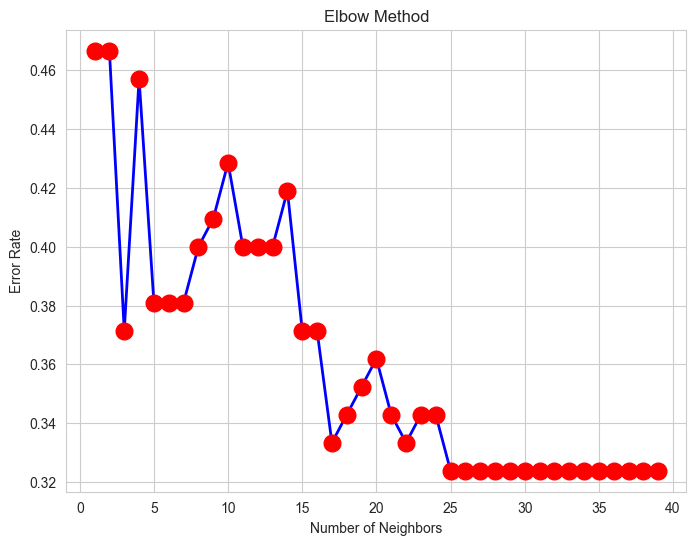

In [230]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='b', marker='o', linewidth=2, markersize=12, markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Elbow Method')

In [231]:
knn=KNeighborsClassifier(n_neighbors=23)

In [232]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [233]:
knn_prediction=knn.predict(X_test)

In [234]:
print(confusion_matrix(y_test,knn_prediction))
print('\n')
print(classification_report(y_test,knn_prediction))
print('\n')
print('KNN accuracy Accuracy: ', accuracy_score(y_test,knn_prediction))

[[ 1 33]
 [ 3 68]]


              precision    recall  f1-score   support

           0       0.25      0.03      0.05        34
           1       0.67      0.96      0.79        71

    accuracy                           0.66       105
   macro avg       0.46      0.49      0.42       105
weighted avg       0.54      0.66      0.55       105



KNN accuracy Accuracy:  0.6571428571428571


##### 4-5-SVC

In [235]:
svc=SVC()

In [236]:
svc.fit(X_train, y_train)

SVC()

In [237]:
svc_prediction=svc.predict(X_test)

In [238]:
print(confusion_matrix(y_test,svc_prediction))
print('\n')
print(classification_report(y_test,svc_prediction))
print('\n')
print('SVC َAccuracy: ', accuracy_score(y_test,svc_prediction))

[[ 0 34]
 [ 0 71]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.68      1.00      0.81        71

    accuracy                           0.68       105
   macro avg       0.34      0.50      0.40       105
weighted avg       0.46      0.68      0.55       105



SVC َAccuracy:  0.6761904761904762


c:\Users\sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [239]:
print('Logistic Regression Accuracy: ', accuracy_score(y_test,lr_prediction))
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))
print('KNN Accuracy: ', accuracy_score(y_test,knn_prediction))
print('SVC Accuracy: ', accuracy_score(y_test,svc_prediction))

Logistic Regression Accuracy:  0.8095238095238095
Decision Tree Accuracy:  0.638095238095238
Random Forest Accuracy:  0.7428571428571429
KNN Accuracy:  0.6571428571428571
SVC Accuracy:  0.6761904761904762


### CONCLUSION

The Loan Status is heavily dependent on the Credit History for Predictions.

The Logistic Regression algorithm gives us the maximum Accuracy (80%) compared to the other 4 Machine Learning Classification Algorithms.

In [240]:
with open('model.pkl', 'wb') as f:
    pickle.dump(lr, f)